# Experiment 1

In [35]:
import pandas as pd
import json

# Ścieżka do pliku JSON
file_path = 'experiments_results_base_parameters/all_results.json'

# Otwarcie i wczytanie danych z pliku
with open(file_path, 'r') as file:
    data = file.read()

# Replacing '}{' with '},{'
corrected_data = data.replace("}{", "},{")

# Adding brackets to make it a valid JSON array
json_data = "[" + corrected_data + "]"

# Loading data into a pandas DataFrame
df_list = []
for entry in json.loads(json_data):
    # Flattening the nested 'results' dictionary
    flat_entry = {**entry, **entry.pop('results')}
    df_list.append(flat_entry)

df = pd.DataFrame(df_list)
df[['accuracy', 'precision', 'recall', 'f1_score', 'time']] = df[['accuracy', 'precision', 'recall', 'f1_score', 'time']].round(4)
# Wyświetlenie pierwszych kilku wierszy DataFrame'u
df.head()


,date,algorithm,dataset,labeled_size,hyperparameters,accuracy,precision,recall,f1_score,time
0,2023-11-17 16:18:55,Tri_Training,cifar10,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.6075,0.6089,0.6010,0.6049,294.0894
1,2023-11-17 16:19:28,Tri_Training,imdb,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.8471,0.8479,0.8458,0.8469,18.1494
2,2023-11-17 16:19:29,Tri_Training,breast_cancer,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.9649,0.9589,0.9859,0.9722,0.5451
3,2023-11-17 16:57:26,Assemble,cifar10,0.3,{'base_estimator': RandomForestClassifier()},0.6250,0.6457,0.5540,0.5963,2268.5133
4,2023-11-17 19:17:28,Assemble,imdb,0.3,{'base_estimator': RandomForestClassifier()},0.7889,0.7820,0.8011,0.7915,8219.3441


In [36]:
df[df.dataset=='cifar10']

,date,algorithm,dataset,labeled_size,hyperparameters,accuracy,precision,recall,f1_score,time
0,2023-11-17 16:18:55,Tri_Training,cifar10,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.6075,0.6089,0.601,0.6049,294.0894
3,2023-11-17 16:57:26,Assemble,cifar10,0.3,{'base_estimator': RandomForestClassifier()},0.6250,0.6457,0.554,0.5963,2268.5133
6,2023-11-17 19:27:53,SemiBoost,cifar10,0.3,{'base_estimator': RandomForestClassifier()},0.5105,0.5054,0.981,0.6671,529.4418
9,2023-11-18 00:40:11,LapSVM,cifar10,0.3,{},0.5000,0.5000,1.000,0.6667,1170.3070
12,2023-11-18 14:10:21,TSVM,cifar10,0.3,{},0.6075,0.6057,0.616,0.6108,27762.7062
15,2023-11-19 15:39:52,LabelPropagation,cifar10,0.3,{},0.5510,0.5631,0.455,0.5033,2.8371


In [42]:
[print(' & '.join(df[df.dataset=='cifar10'].values[i][5:].astype('str'))) for i in range(6)]

0.6075 & 0.6089 & 0.601 & 0.6049 & 294.0894
0.625 & 0.6457 & 0.554 & 0.5963 & 2268.5133
0.5105 & 0.5054 & 0.981 & 0.6671 & 529.4418
0.5 & 0.5 & 1.0 & 0.6667 & 1170.307
0.6075 & 0.6057 & 0.616 & 0.6108 & 27762.7062
0.551 & 0.5631 & 0.455 & 0.5033 & 2.8371


[None, None, None, None, None, None]

In [44]:
df[df.dataset=='imdb']

,date,algorithm,dataset,labeled_size,hyperparameters,accuracy,precision,recall,f1_score,time
1,2023-11-17 16:19:28,Tri_Training,imdb,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.8471,0.8479,0.8458,0.8469,18.1494
4,2023-11-17 19:17:28,Assemble,imdb,0.3,{'base_estimator': RandomForestClassifier()},0.7889,0.7820,0.8011,0.7915,8219.3441
7,2023-11-18 00:20:19,SemiBoost,imdb,0.3,{'base_estimator': RandomForestClassifier()},0.5011,0.5005,1.0000,0.6671,16885.3502
10,2023-11-18 06:27:24,LapSVM,imdb,0.3,{},0.5000,0.5000,1.0000,0.6667,20792.7578
13,2023-11-19 15:39:47,TSVM,imdb,0.3,{},0.8521,0.8451,0.8622,0.8536,91529.1971
16,2023-11-19 15:40:38,LabelPropagation,imdb,0.3,{},0.7303,0.6804,0.8686,0.7631,18.3947


In [43]:
[print(' & '.join(df[df.dataset=='imdb'].values[i][5:].astype('str'))) for i in range(6)]

0.8471 & 0.8479 & 0.8458 & 0.8469 & 18.1494
0.7889 & 0.782 & 0.8011 & 0.7915 & 8219.3441
0.5011 & 0.5005 & 1.0 & 0.6671 & 16885.3502
0.5 & 0.5 & 1.0 & 0.6667 & 20792.7578
0.8521 & 0.8451 & 0.8622 & 0.8536 & 91529.1971
0.7303 & 0.6804 & 0.8686 & 0.7631 & 18.3947


[None, None, None, None, None, None]

In [45]:
df[df.dataset=='breast_cancer']

,date,algorithm,dataset,labeled_size,hyperparameters,accuracy,precision,recall,f1_score,time
2,2023-11-17 16:19:29,Tri_Training,breast_cancer,0.3,"{'base_estimator': RandomForestClassifier(), '...",0.9649,0.9589,0.9859,0.9722,0.5451
5,2023-11-17 19:19:00,Assemble,breast_cancer,0.3,{'base_estimator': RandomForestClassifier()},0.9649,0.9589,0.9859,0.9722,90.8099
8,2023-11-18 00:20:39,SemiBoost,breast_cancer,0.3,{'base_estimator': RandomForestClassifier()},0.8246,0.7802,1.0000,0.8765,19.3610
11,2023-11-18 06:27:25,LapSVM,breast_cancer,0.3,{},0.9474,0.9452,0.9718,0.9583,0.4316
14,2023-11-19 15:39:48,TSVM,breast_cancer,0.3,{},0.9561,0.9714,0.9577,0.9645,0.3861
17,2023-11-19 15:40:38,LabelPropagation,breast_cancer,0.3,{},0.9211,0.9189,0.9577,0.9379,0.3133


In [47]:
[print(' & '.join(df[df.dataset=='breast_cancer'].values[i][4:].astype('str'))) for i in range(6)]

{'base_estimator': RandomForestClassifier(), 'base_estimator_2': LinearSVC(max_iter=10000), 'base_estimator_3': GaussianNB()} & 0.9649 & 0.9589 & 0.9859 & 0.9722 & 0.5451
{'base_estimator': RandomForestClassifier()} & 0.9649 & 0.9589 & 0.9859 & 0.9722 & 90.8099
{'base_estimator': RandomForestClassifier()} & 0.8246 & 0.7802 & 1.0 & 0.8765 & 19.361
{} & 0.9474 & 0.9452 & 0.9718 & 0.9583 & 0.4316
{} & 0.9561 & 0.9714 & 0.9577 & 0.9645 & 0.3861
{} & 0.9211 & 0.9189 & 0.9577 & 0.9379 & 0.3133


[None, None, None, None, None, None]

# Experiment 2

## Tables

In [3]:
import pandas as pd
import json

updated_file_path = 'experiments_results_all_parameters/all_results.json'
with open(updated_file_path, 'r') as file:
    updated_lp_results = json.load(file)

updated_df = pd.DataFrame(updated_lp_results)

updated_test_results = updated_df['results_test'].apply(pd.Series)
updated_df = pd.concat([updated_df, updated_test_results], axis=1)

updated_df.drop(['hyperparameters', 'results_train', 'results_test'], axis=1, inplace=True)

grouped_data = updated_df.groupby(['dataset','algorithm'])[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']].agg(['mean', 'std'])
grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]

def format_mean_std(mean, std):
    return f"{mean:.4f} ({std:.4f})"

formatted_data = {}
for column in grouped_data.columns:
    if 'mean' in column:
        metric = column.replace(' mean', '')
        mean_column = grouped_data[column]
        std_column = grouped_data[metric + ' std']
        formatted_data[metric] = mean_column.combine(std_column, format_mean_std)

formatted_results_df = pd.DataFrame(formatted_data)
formatted_results_df.reset_index(inplace=True)
formatted_results_df


,dataset,algorithm,test_accuracy,test_precision,test_recall,test_f1_score,training_time
0,breast_cancer,Assemble,0.9566 (0.0082),0.9535 (0.0065),0.9781 (0.0121),0.9656 (0.0067),63.0173 (177.2020)
1,breast_cancer,LabelPropagation,0.9423 (0.0147),0.9439 (0.0163),0.9648 (0.0074),0.9542 (0.0114),0.0278 (0.0286)
2,breast_cancer,LapSVM,0.9605 (0.0144),0.9587 (0.0148),0.9789 (0.0077),0.9687 (0.0113),0.6238 (0.1964)
3,breast_cancer,SemiBoost,0.9050 (0.0474),0.8816 (0.0557),0.9842 (0.0225),0.9290 (0.0329),2.8296 (5.3775)
4,breast_cancer,Tri_Training,0.9649 (nan),0.9589 (nan),0.9859 (nan),0.9722 (nan),0.6972 (nan)
5,cifar10,Assemble,0.5936 (0.0311),0.5978 (0.0396),0.5884 (0.0375),0.5915 (0.0216),2282.2226 (4131.5647)
6,cifar10,LabelPropagation,0.5703 (0.0203),0.5752 (0.0128),0.5290 (0.0775),0.5492 (0.0480),1.5526 (0.9802)
7,cifar10,LapSVM,0.5017 (0.0019),0.5009 (0.0010),0.9910 (0.0099),0.6654 (0.0014),8258.8986 (7771.9512)
8,cifar10,SemiBoost,0.5526 (0.0383),0.5424 (0.0351),0.7769 (0.1506),0.6306 (0.0381),1324.4560 (2384.1859)
9,cifar10,Tri_Training,0.6075 (nan),0.6112 (nan),0.5910 (nan),0.6009 (nan),297.8869 (nan)


In [19]:
algorithm = "LabelPropagation"
formatted_results_df[formatted_results_df.algorithm == algorithm][['dataset', 'test_accuracy', 'test_precision','test_recall', 'test_f1_score', 'training_time']]

,dataset,test_accuracy,test_precision,test_recall,test_f1_score,training_time
1,breast_cancer,0.9423 (0.0147),0.9439 (0.0163),0.9648 (0.0074),0.9542 (0.0114),0.0278 (0.0286)
6,cifar10,0.5703 (0.0203),0.5752 (0.0128),0.5290 (0.0775),0.5492 (0.0480),1.5526 (0.9802)
11,imdb,0.6896 (0.0426),0.6506 (0.0314),0.8173 (0.0547),0.7244 (0.0405),10.0149 (8.1294)


In [13]:
algorithm = "LabelPropagation"
formatted_results_df[formatted_results_df.algorithm == algorithm][['dataset', 'test_accuracy', 'test_precision','test_recall', 'test_f1_score', 'training_time']].to_latex()

'\\begin{tabular}{lllllll}\n\\toprule\n{} &        dataset &    test\\_accuracy &   test\\_precision &      test\\_recall &    test\\_f1\\_score &     training\\_time \\\\\n\\midrule\n1  &  breast\\_cancer &  0.9423 (0.0147) &  0.9439 (0.0163) &  0.9648 (0.0074) &  0.9542 (0.0114) &   0.0278 (0.0286) \\\\\n6  &        cifar10 &  0.5703 (0.0203) &  0.5752 (0.0128) &  0.5290 (0.0775) &  0.5492 (0.0480) &   1.5526 (0.9802) \\\\\n11 &           imdb &  0.6896 (0.0426) &  0.6506 (0.0314) &  0.8173 (0.0547) &  0.7244 (0.0405) &  10.0149 (8.1294) \\\\\n\\bottomrule\n\\end{tabular}\n'

## Plots

### Tri-Training

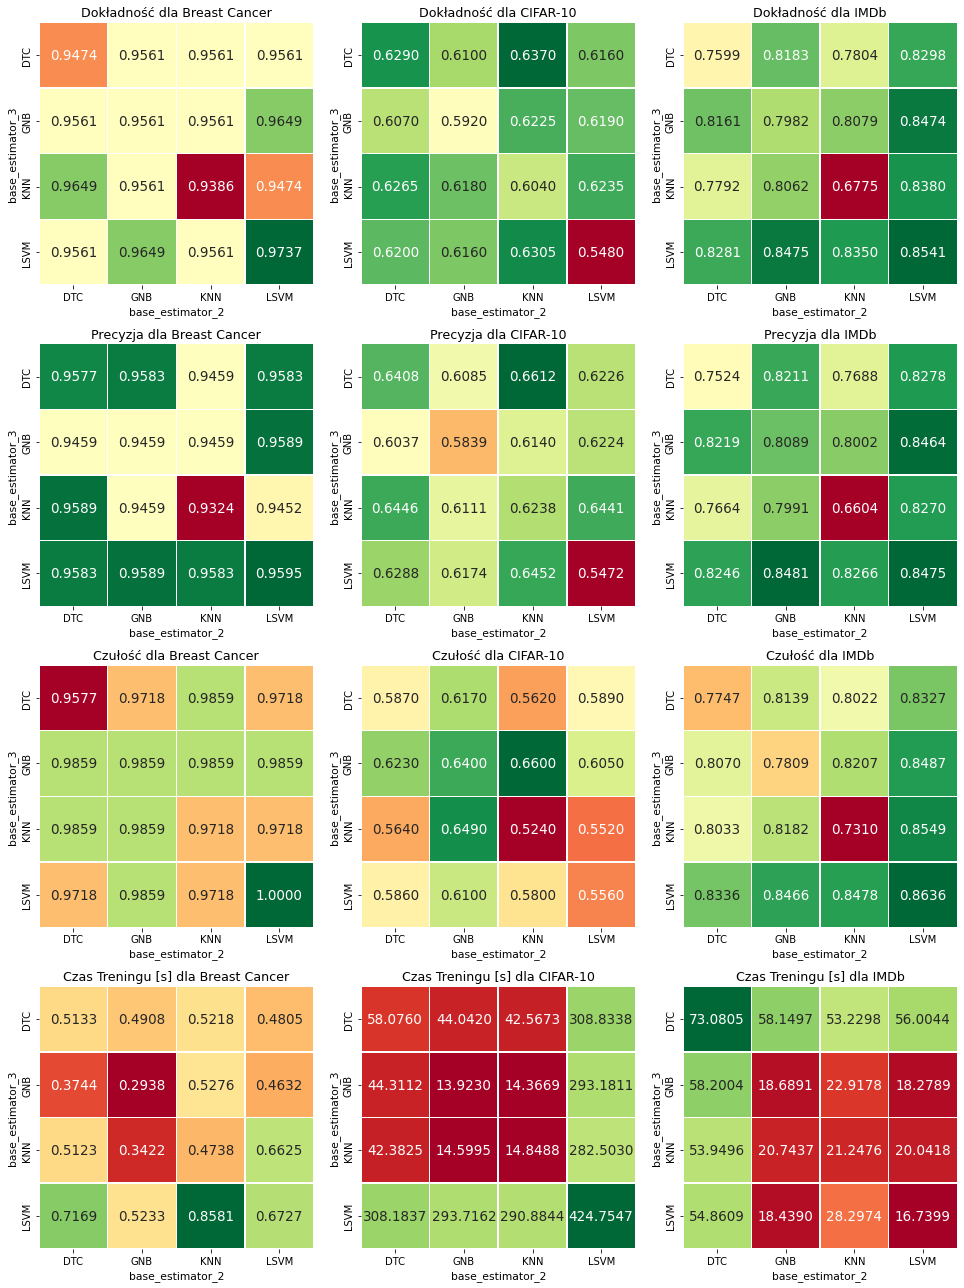

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
name_mapping = {
    'RandomForestClassifier()': 'RFC',
    'DecisionTreeClassifier()': 'DTC',
    'KNeighborsClassifier()': 'KNN',
    'LinearSVC(max_iter=10000)': 'LSVM',
    'SVC': 'SVC',
    'GaussianNB()': 'GNB'
}

algorithm = "Tri_Training"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['base_estimator_2'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator_2']))
df_updated['base_estimator_3'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator_3']))

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['base_estimator_2'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)
df_updated['base_estimator_2'] = df_updated['base_estimator_2'].map(name_mapping)
df_updated['base_estimator_3'] = df_updated['base_estimator_3'].map(name_mapping)

multiplier = 0.9
title_dic = {'cifar10': 'CIFAR-10', 'imdb': 'IMDb', 'breast_cancer': 'Breast Cancer'}

plt.figure(figsize=(15 * multiplier, 20 * multiplier))

for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        # Przygotowanie danych dla heatmapy
        subset = df_updated[df_updated['dataset'] == dataset]
        pivot_table = subset.pivot("base_estimator_2", "base_estimator_3", metric)
        
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        sns.heatmap(pivot_table, annot=True, fmt=".4f", linewidths=.5,annot_kws={"size": 15*multiplier}, cmap="RdYlGn", cbar=False)
        
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14 * multiplier)
        plt.xlabel('base_estimator_2', fontsize=12 * multiplier)
        plt.ylabel('base_estimator_3', fontsize=12 * multiplier)

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}_heatmap.pdf')
plt.show()


### Assemble

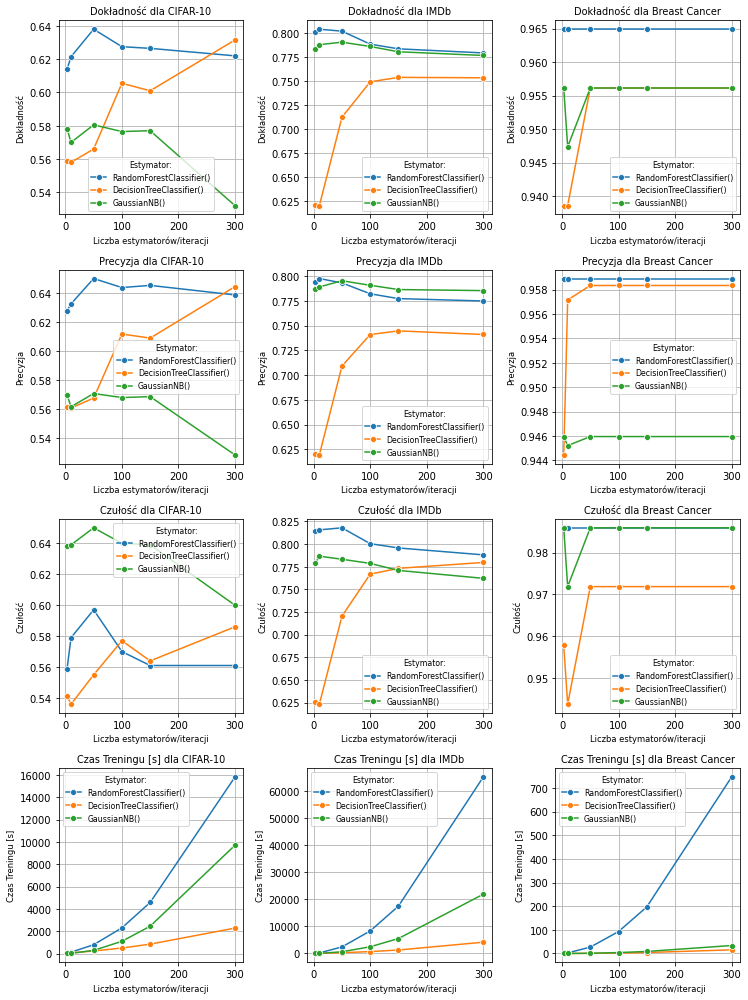

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "Assemble"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['base_estimator'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator']))
df_updated['T'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['T'])

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['base_estimator'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['base_estimator'] == kernel)]
            sns.lineplot(data=subset, x='T', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba estymatorów/iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Estymator:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()

### SemiBoost

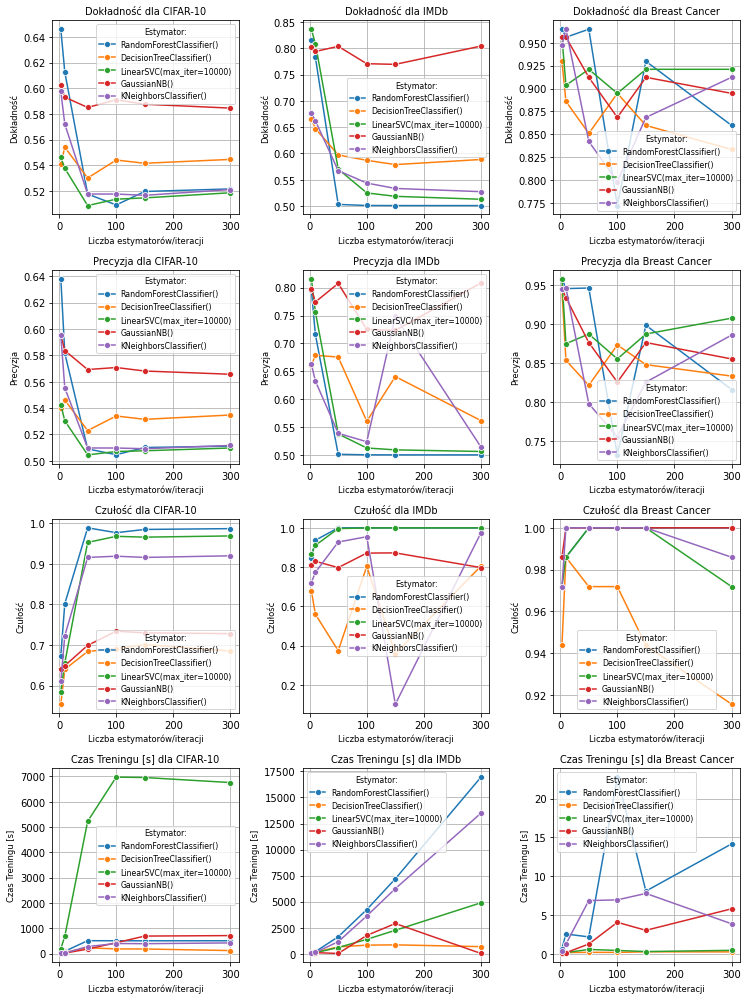

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "SemiBoost"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['base_estimator'] = df_updated['hyperparameters'].apply(lambda x: str(eval(x)['base_estimator']))
df_updated['T'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['T'])

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['base_estimator'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['base_estimator'] == kernel)]
            sns.lineplot(data=subset, x='T', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba estymatorów/iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Estymator:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()

### LapSVM

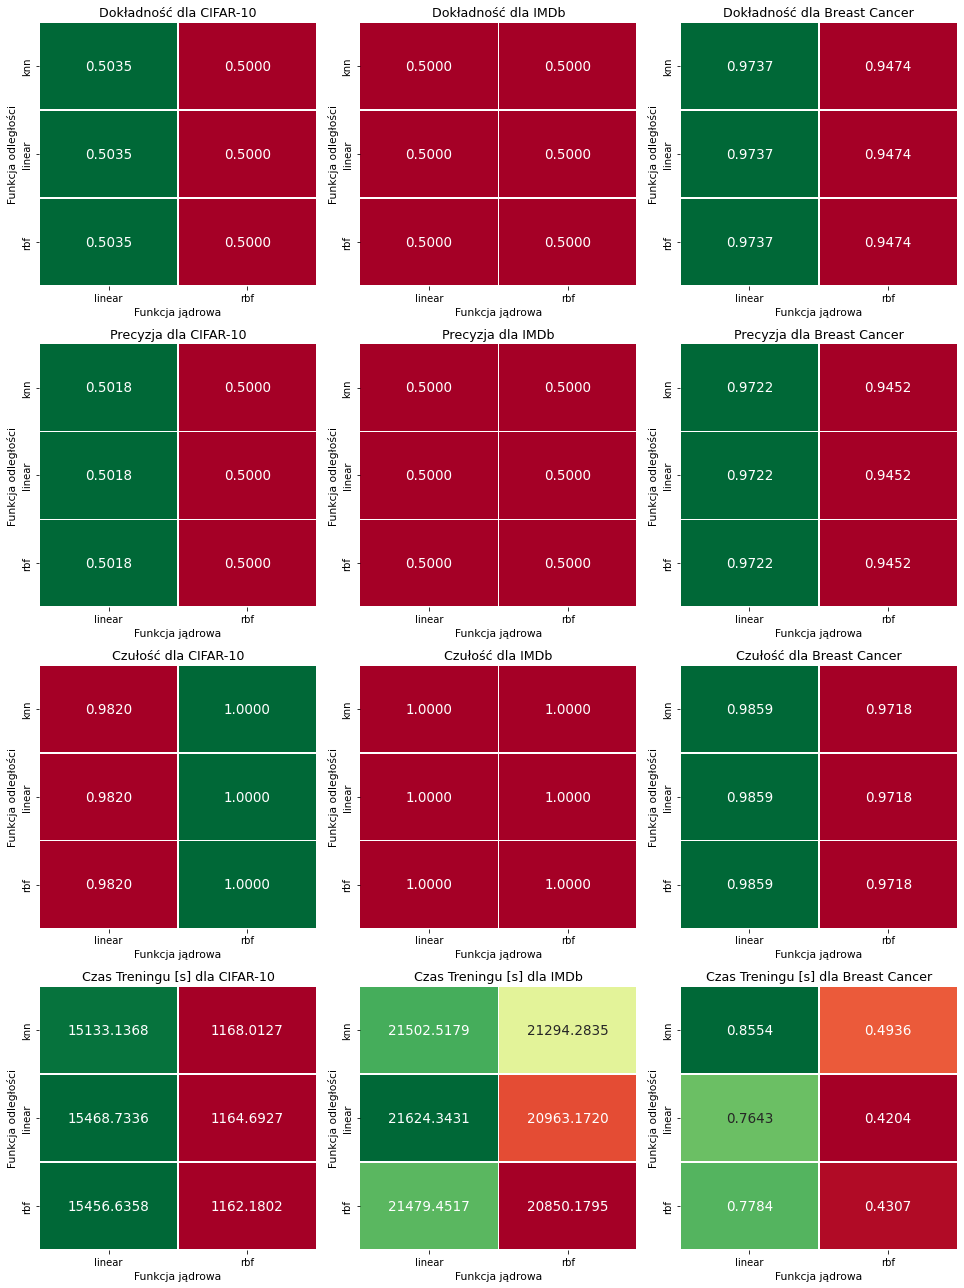

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "LapSVM"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]

df_updated['distance_function'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['distance_function'])
df_updated['kernel_function'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['kernel_function'])

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['distance_function'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)


multiplier = 0.9
title_dic = {'cifar10': 'CIFAR-10', 'imdb': 'IMDb', 'breast_cancer': 'Breast Cancer'}
plt.figure(figsize=(15 * multiplier, 20 * multiplier))

for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        # Przygotowanie danych dla heatmapy
        subset = df_updated[df_updated['dataset'] == dataset]
        pivot_table = subset.pivot("distance_function", "kernel_function", metric)
        
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        sns.heatmap(pivot_table, annot=True, fmt=".4f", linewidths=.5,annot_kws={"size": 15*multiplier}, cmap="RdYlGn", cbar=False)
        
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=15 * multiplier)
        plt.xlabel('Funkcja jądrowa', fontsize=12 * multiplier)
        plt.ylabel('Funkcja odległości', fontsize=12 * multiplier)

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}_heatmap.pdf')
plt.show()


### TSVM

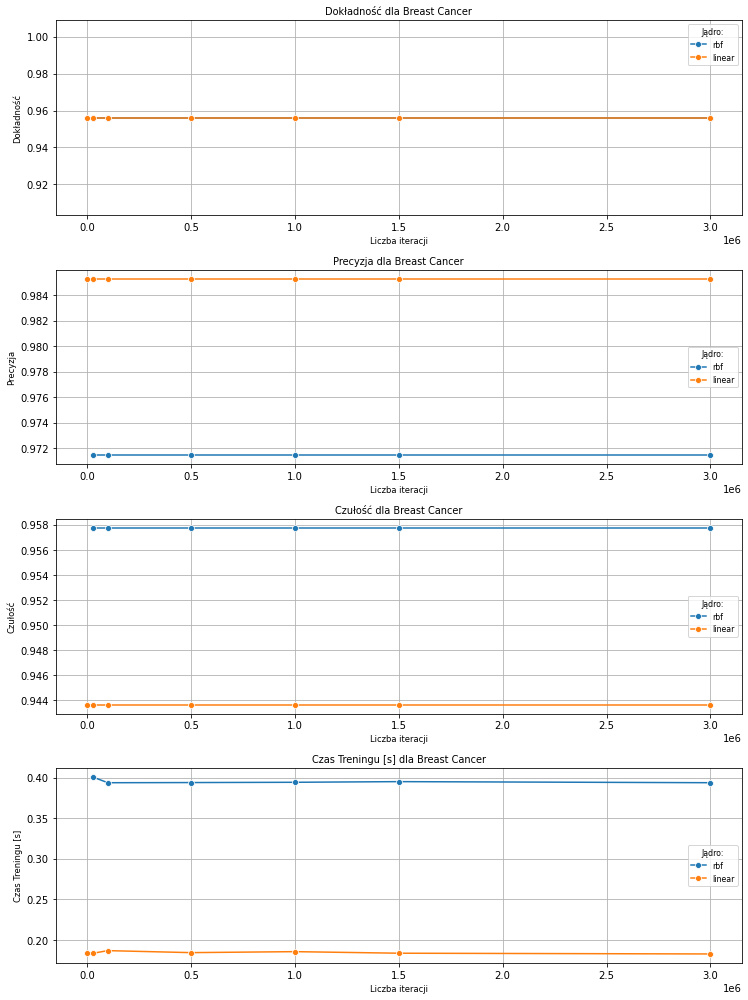

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "TSVM"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]


df_updated['kernel'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['kernel'])
df_updated['max_iter'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['max_iter'])

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['kernel'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['kernel'] == kernel)]
            sns.lineplot(data=subset, x='max_iter', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Jądro:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig(f'plots/hyperparameters_{algorithm}.pdf')
plt.show()

### Label Propagation

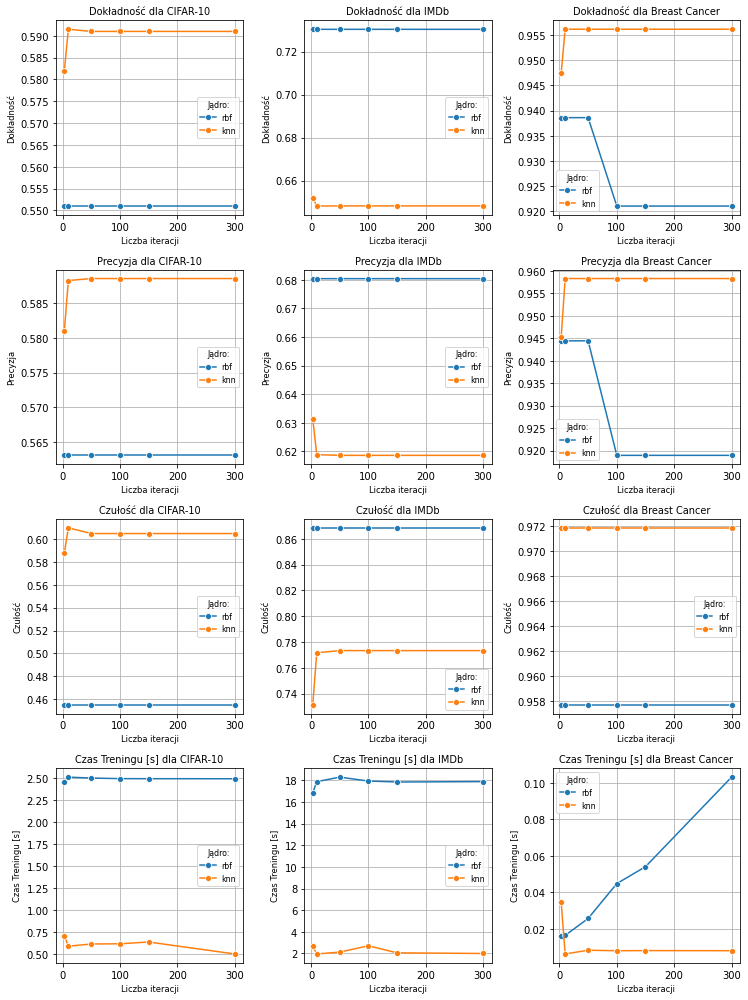

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path_updated = 'executed_experiments/experiment_2_results_combined/all_results.json'
with open(file_path_updated, 'r') as file:
    lp_results_updated = json.load(file)
    
    
algorithm = "LabelPropagation"
df_updated = pd.DataFrame(lp_results_updated)
df_updated = df_updated[df_updated.algorithm == algorithm]


df_updated['kernel'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['kernel'])
df_updated['max_iter'] = df_updated['hyperparameters'].apply(lambda x: eval(x)['max_iter'])

df_updated.head()

datasets = df_updated['dataset'].unique()
kernels = df_updated['kernel'].unique()

# metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'training_time']
# titles = ['Dokładność', 'Precyzja', 'Czułość', 'Miara F1', 'Czas Treningu']
metrics_for_plot = ['test_accuracy', 'test_precision', 'test_recall', 'training_time']
titles = ['Dokładność', 'Precyzja', 'Czułość', 'Czas Treningu [s]']

# Flatten the 'results_test' into separate columns
test_results_columns = df_updated['results_test'].apply(pd.Series)
df_updated = pd.concat([df_updated.drop(['results_test'], axis=1), test_results_columns], axis=1)

multiplier = 0.7
title_dic = {'cifar10' : 'CIFAR-10', 'imdb' : 'IMDb', 'breast_cancer' : 'Breast Cancer'}
#plt.figure(figsize=(20*multiplier, 15*multiplier))
#for i, dataset in enumerate(datasets):
    #for j, metric in enumerate(metrics_for_plot):
        #plt.subplot(len(datasets), len(metrics_for_plot), i * len(metrics_for_plot) + j + 1)
plt.figure(figsize=(15*multiplier, 20*multiplier))
for j, metric in enumerate(metrics_for_plot):
    for i, dataset in enumerate(datasets):
        plt.subplot(len(metrics_for_plot), len(datasets), j * len(datasets) + i + 1)
        for kernel in kernels:
            subset = df_updated[(df_updated['dataset'] == dataset) & (df_updated['kernel'] == kernel)]
            sns.lineplot(data=subset, x='max_iter', y=metric, label=kernel, marker='o')
        plt.title(f'{titles[j]} dla {title_dic[dataset]}', fontsize=14*multiplier)
        plt.xlabel('Liczba iteracji', fontsize=12*multiplier)
        plt.ylabel(titles[j], fontsize=12*multiplier)
        plt.legend(title='Jądro:', fontsize=11*multiplier, title_fontsize=11*multiplier)
        plt.grid()

plt.tight_layout()
plt.savefig('plots/hyperparameters_labelpropagation.pdf')
plt.show()